<center>
    <h1>XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU</h1>
</center>    

---

* Mất cân bằng dữ liệu là một trong những hiện tượng phổ biến của bài toán phân loại, cụ thể là với bài toán phân loại nhị phân như phân loại email spam, phát hiện gian lận, dự báo vỡ nợ, chuẩn đoán bệnh lý,…

* Trong trường hợp tỷ lệ dữ liệu giữa 2 lớp là ~ 50:50 thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 lớp, chẳng hạn như 70:30 thì dữ liệu có hiện tượng mất cân bằng.

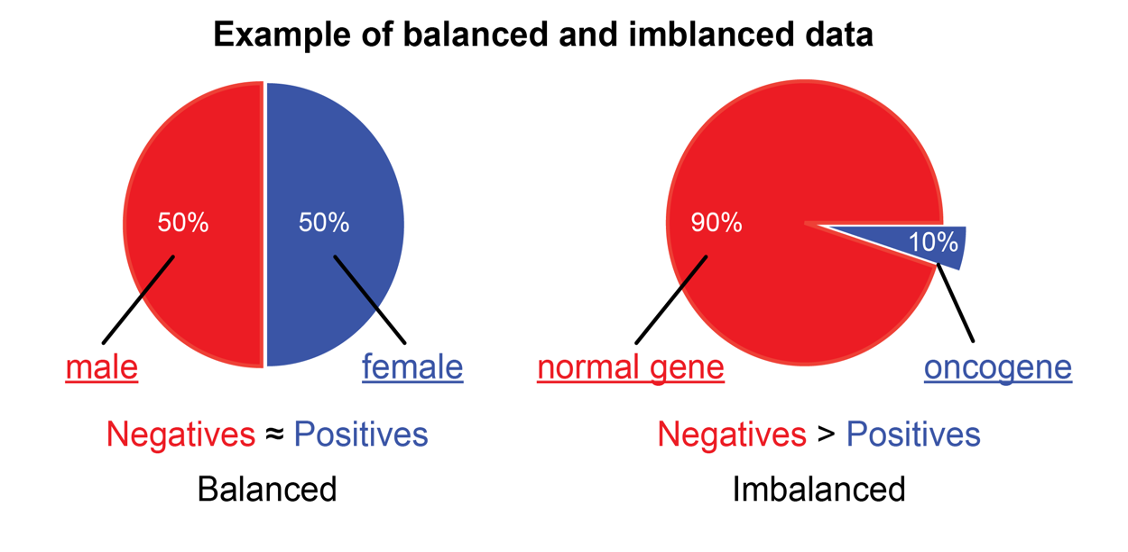

* Google chia ra thành 3 mức độ mất cân bằng dữ liệu:
<table>
    <tr>
    <td style='fontwight:bold'>Mức độ mất cân bằng
       <br>(Degree of inbalanced)
    </td>
    <td>Tỷ lệ của lớp thiểu số trong tập dữ liệu liệu <br>(Proportion of Minority Class)
    </td>
    </tr>
     <tr>
    <td>Nhẹ (Mild)
    </td>
    <td>Chiếm 20 - 40% tập dữ liệu
    </td>
    </tr>
     <tr>
    <td>Trung bình (Moderate)
    </td>
    <td>Chiếm 1 – 20 % tập dữ liệu
    </td>
    </tr>
    <tr>
    <td>Cực đoan (Extreme))
    </td>
    <td>Chiếm dưới 1% tập dữ liệu
    </td>
    </tr>
</table>

* Mất cân bằng dữ liệu thường dẫn tới dự báo kém chính xác trên lớp thiểu số (Minority class). Bởi đa phần kết quả dự báo ra thường thiên về 1 lớp là lớp đa số (Majority class) và rất kém trên lớp thiểu số. 
* Trong khi tầm quan trọng của việc dự báo được chính xác một mẫu thuộc lớp thiểu số lớn hơn nhiều so với dự báo mẫu thuộc lớp đa số.
* Các tác động của dữ liệu mất cân bằng là tiềm ẩn, tức là nó không gây ra lỗi ngay lập tức khi xây dựng và chạy mô hình, nhưng kết quả của nó có thể gây nhầm lẫn.

---
***Copyright: Đặng Văn Nam - FIT.HUMG - 2024***

# A. Một số Ví dụ tập dữ liệu mất cân bằng:
---

## 1.Tập dữ liệu uci_malware_detection.csv: 

Bộ dữ liệu chứa các tính năng được trích xuất từ các tệp thực thi trên hệ điều hành Windows với 2 loại độc hại (malicious) và không độc hại (non-malicuous). Tập dữ liệu bao gồm 531 thuộc tính (features) độc lập được gán nhãn từ F1 tới F531, thuộc tính phụ thuộc Label cho biết là tệp độc hại hay không độc hại.
* Tập dữ liệu chứa tổng số mẫu: 373, trong đó:
    * Tệp không độc hại (Label: non-malicious): 301 ~ 80,7 %
    * Tệp độc hại (Label: malicious): 72 ~ 19.3 %
    
* Tập dữ liệu mất cân bằng ở mức trung bình (Moderate)
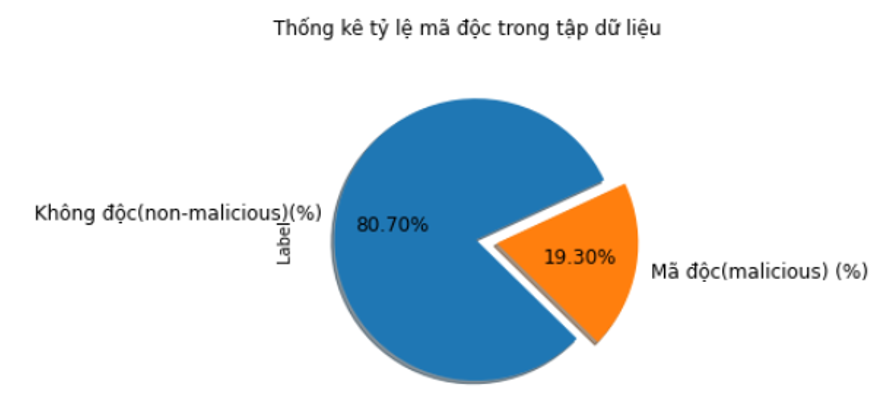

## 2.Tập dữ liệu creditcard.csv: 
* Bộ dữ liệu chứa các giao dịch được thực hiện bằng thẻ tín dụng trong 2 ngày của tháng 09/2013 bởi các chủ thẻ tại Châu Âu. Tập dữ liệu bao gồm 30 thuộc tính độc lập [Time,V1,V2…V28, Amount] chứa thông tin về giao dịch của chủ thẻ. Thuộc tính phụ thuộc [Class] cho biết giao dịch này là Bình thường – 0, hay gian lận – 1.
* Tập dữ liệu chứa tổng số mẫu: 284 407, trong đó:
    * Giao dịch bình thường (Class = 0): 284 315 ~ 99.83 %
    * Giao dịch gian lận (Class = 1)         : 492 ~ 0.17 %
* Tập dữ liệu liệu mất cân bằng ở mức cực đoan (Extreme).
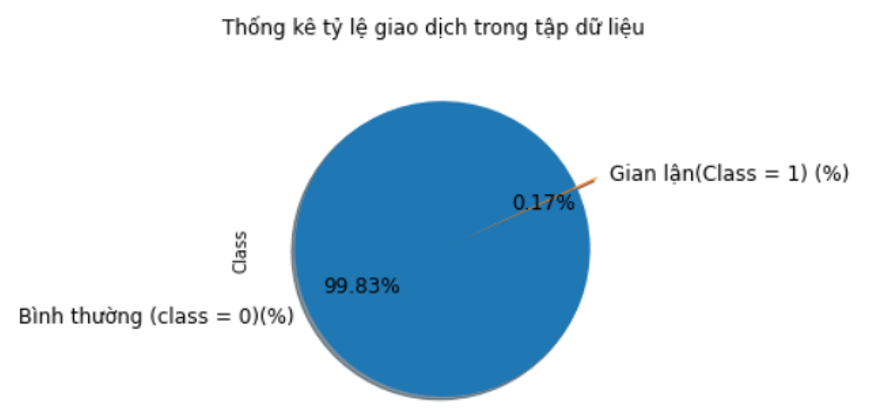

# B.Các phương pháp xử lý tập dữ liệu mất cân bằng
---

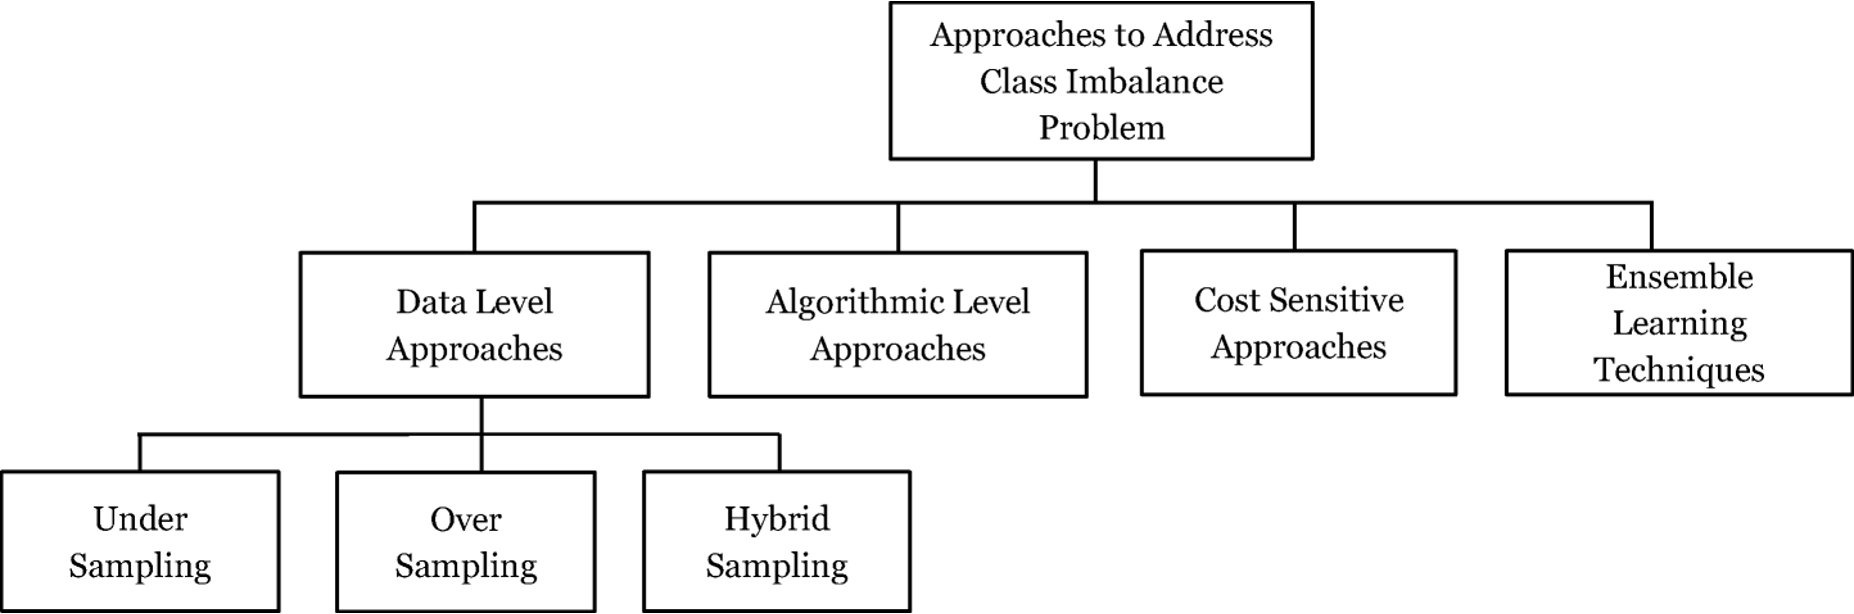

Các kỹ thuật xử lý đề cập dưới đây trong bài viết này chỉ tập trung vào Phương pháp đầu tiên dựa trên mức độ của dữ liệu, bao gồm:
- Kỹ thuật Undersampling: Giảm số lượng mẫu của lớp đa số để cân bằng với lớp thiểu số
- Kỹ thuật Oversampling: Tăng số lượng mẫu của lớp thiểu số để cân bằng với lớp đa số
- Kỹ thuật Hybridsampling: Kết hợp cả Undersampling và Oversampling

In [1]:
#Gọi các thư viện sử dụng
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Tạo tập dữ liệu mẫu không cân bằng (imbalance data) bao gồm: 10 000 mẫu với Biến độc lập X gồm 2 thuộc tính (features); được phần thành 2 lớp, trong đó:
* Lớp 0 (majority class): chiếm 95% ~ 9500 mẫu
* Lớp 1 (minority class): chiếm 5% ~ 500 mẫu

In [2]:
from sklearn.datasets import make_classification
#Tạo dữ liệu mẫu thực hiện cân bằng
X, y = make_classification(n_samples=10000, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1, 
                           weights=[0.95], 
                           flip_y=0, 
                           random_state=1)
print('Biến độc lập:\n', X)
print('Biến phụ thuộc:\n',y)

Biến độc lập:
 [[0.22201371 0.54020654]
 [1.34743875 1.41282352]
 [0.53723817 0.37273043]
 ...
 [1.87813003 0.82950037]
 [2.58593336 1.92799501]
 [1.1233558  1.04575545]]
Biến phụ thuộc:
 [0 0 0 ... 0 0 0]


In [3]:
# Thống kê số lượng mẫu theo từng lớp:
counter = Counter(y)
print(counter)

Counter({0: 9500, 1: 500})


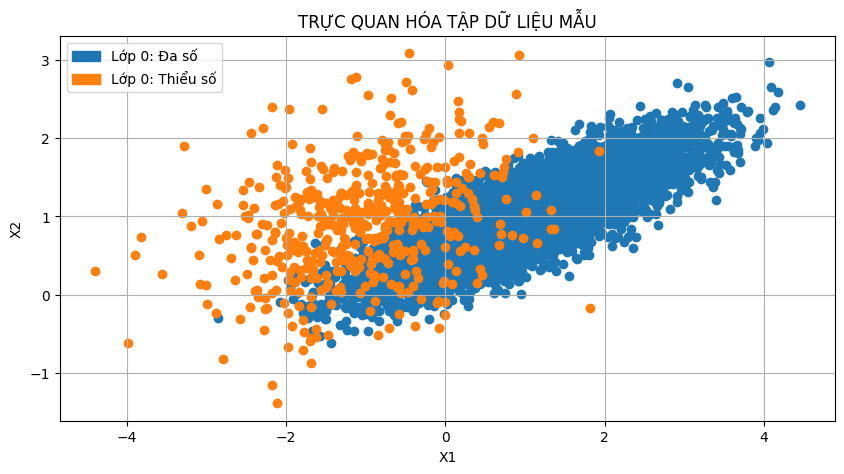

In [4]:
blue_patch = mpatches.Patch(color='#1E77B4',hatch='o', label='Lớp 0: Đa số')
orange_patch = mpatches.Patch(color='#FF7F0F',hatch='o', label='Lớp 0: Thiểu số')

# Trực quan hóa dữ liệu:
plt.figure(figsize=[10,5])
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU')
plt.show()

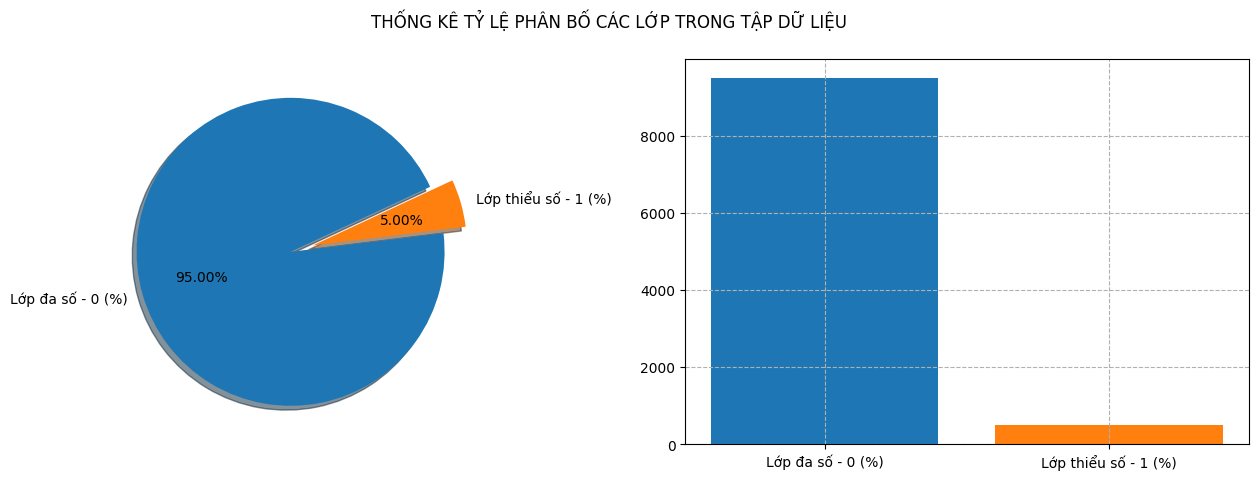

In [5]:
class_y = list(counter.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu mẫu:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU', fontsize=12)
plt.show()

#--> Dữ liệu mất cân bằng trung bình

## B.1 Kỹ thuật Undersampling
---
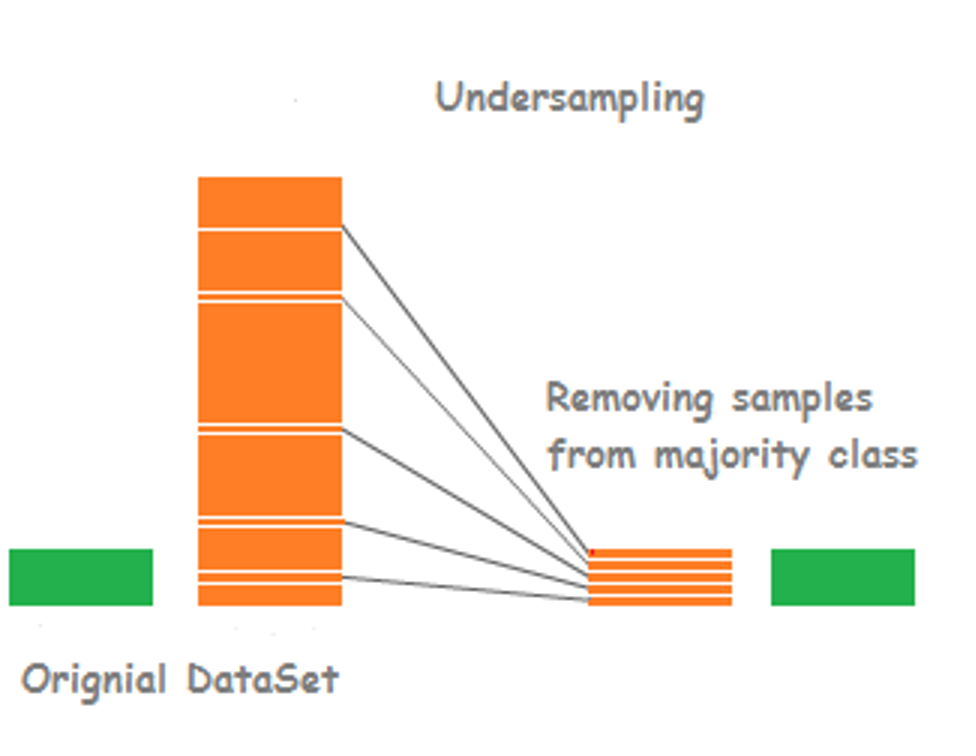

* Ưu điểm là làm cân bằng mẫu một cách nhanh chóng, dễ dàng tiến hành thực hiện mà không cần đến thuật toán giả lập. 
* Nhược điểm của phương pháp này là số lượng mẫu sẽ bị giảm đi đáng kể. Tập huấn luyện mới sau khi Undersampling khá nhỏ, không đại diện cho phân phối của toàn bộ tập dữ liệu và thường dễ dấn tới hiện tượng Overfitting. 

---
Giới thiệu thư viện imbalanced là thư viện Python sử dụng các thuật toán cho phép cân bằng dữ liệu
Link: https://pypi.org/project/imbalanced-learn/

In [6]:
#[NOTE] Bỏ dấu # để cài đặt thư viện imblearn trong trường hợp chưa cài đặt
#!pip install imbalanced-learn

In [7]:
#Gọi thư viện imblearn
import imblearn
print('Phiên bản thư viện Imblearn:', imblearn.__version__)

Phiên bản thư viện Imblearn: 0.12.0


Counter({0: 500, 1: 500})


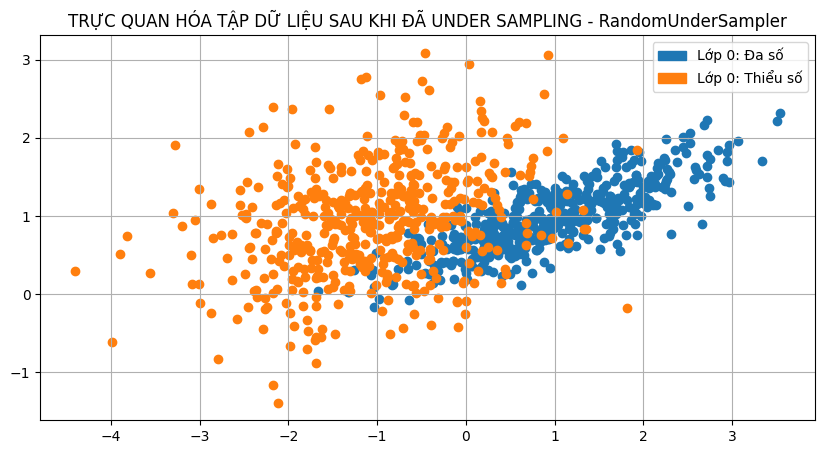

In [8]:
#1. Kỹ thuật UnderSampling: Thuật toán RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
#Sử dụng RandomUnderSampler để cân bằng dữ liệu
#Tham số sampling_strategy (0,1] thiết lập tỷ lệ Under_sampling lớp thiểu số với lớp đa số
under = RandomUnderSampler(sampling_strategy=1,
                           random_state=42)
#Thực hiện cân bằng:
X01, y01 = under.fit_resample(X, y)


#Thống kê số lượng các lớp sau cân bằng:
counter01 = Counter(y01)
print(counter01)

#Trực quan hóa kết quả sau cân bằng:
plt.figure(figsize=[10,5])
for label, _ in counter01.items():
	row_ix = np.where(y01 == label)[0]
	plt.scatter(X01[row_ix, 0], X01[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING - RandomUnderSampler')
plt.show()

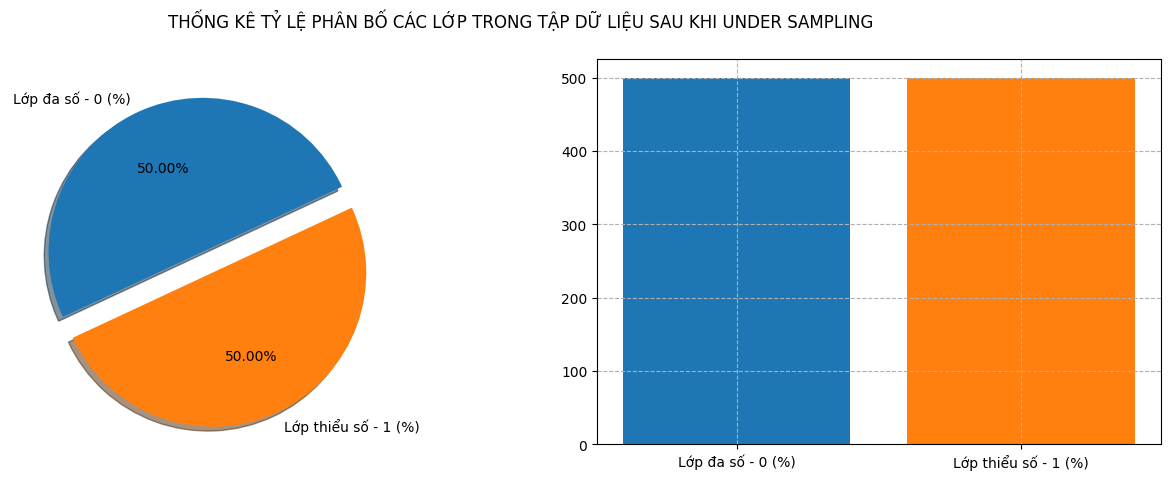

In [9]:
class_y = list(counter01.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI UNDER SAMPLING', fontsize=12)
plt.show()

Counter({0: 500, 1: 500})


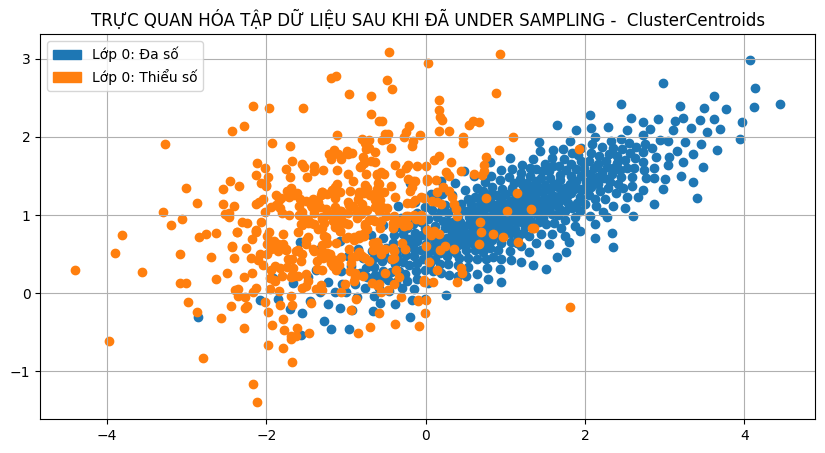

In [10]:
#2. Kỹ thuật Undersampling: Thuật toán ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
#Khai báo
under1 = ClusterCentroids(sampling_strategy=1,
                           random_state=42)
#Thực hiện cân bằng:
X02, y02 = under1.fit_resample(X, y)

#Thống kê kết quả:
counter02 = Counter(y02)
print(counter02)

#Trực quan hóa tập dữ liệu sau cân bằng:
plt.figure(figsize=[10,5])
for label, _ in counter02.items():
	row_ix = np.where(y02 == label)[0]
	plt.scatter(X02[row_ix, 0], X02[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING -  ClusterCentroids')
plt.show()

Counter({0: 500, 1: 500})


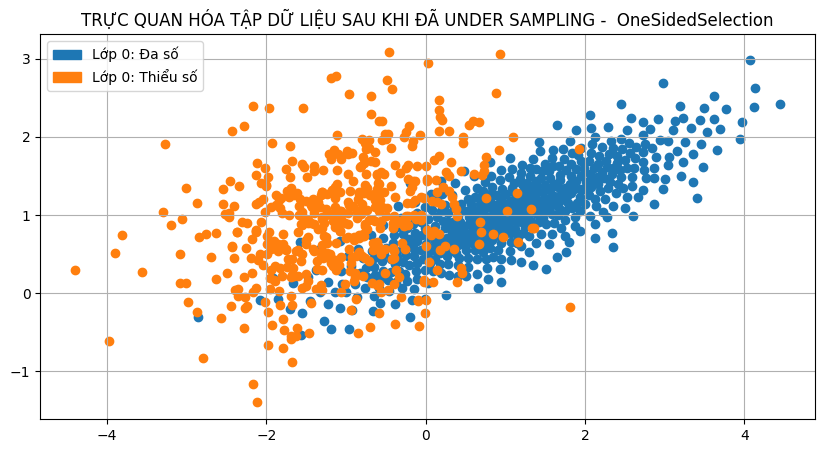

In [11]:
#3. Kỹ thuật UnderSampling: Thuật toán OneSidedSelection

from imblearn.under_sampling import OneSidedSelection 
#Khai báo:
under2 = OneSidedSelection(sampling_strategy=1)
#Thực hiện cân bằng:
X03, y03 = under1.fit_resample(X, y)

#Kết quả:
counter03 = Counter(y03)
print(counter03)

#Trực quan hóa kết quả:
plt.figure(figsize=[10,5])
for label, _ in counter03.items():
	row_ix = np.where(y03 == label)[0]
	plt.scatter(X03[row_ix, 0], X03[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ UNDER SAMPLING -  OneSidedSelection')
plt.show()

## B.2 Kỹ thuật Oversampling: 
---

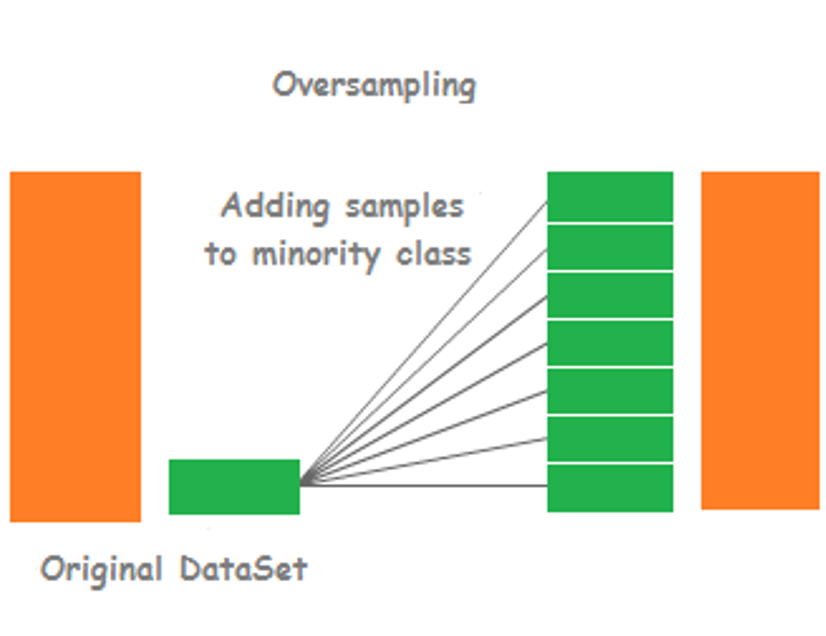

* Over sampling là các phương pháp giúp giải quyết hiện tượng mất cân bằng mẫu bằng cách gia tăng kích thước mẫu thuộc lớp thiểu số bằng các kỹ thuật khác nhau. 
* Có 2 phương pháp chính để để thực hiện Over sampling đó là:
    - Lập lại mẫu hiện có để tăng số lượng mẫu
    - Tạo mẫu mới dựa trên tổng hợp của các mẫu cũ (SMOTE)


### B.2.1) Kỹ thuật Random minority over-sampling
---
Sao chép lại ngẫu nhiên các dữ liệu ban đầu của lớp thiểu số để tăng số lượng mẫu, cân bằng với lớp đa số. Chất lượng dữ liệu không thay đổi chỉ thay đổi số lượng

In [12]:
from imblearn.over_sampling import RandomOverSampler
#Sử dụng RandomOverSampler để cân bằng dữ liệu
#Tham số sampling_strategy (0,1] thiết lập tỷ lệ Under_sampling lớp thiểu số với lớp đa số
under = RandomOverSampler(sampling_strategy=0.8,
                           random_state=42)
X11, y11 = under.fit_resample(X, y)

counter11 = Counter(y11)
print(counter11)

Counter({0: 9500, 1: 7600})


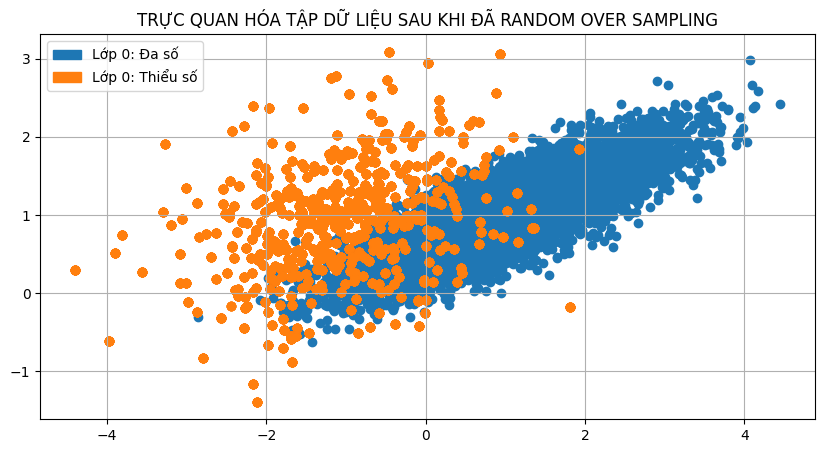

In [13]:
plt.figure(figsize=[10,5])
for label, _ in counter11.items():
	row_ix = np.where(y11 == label)[0]
	plt.scatter(X11[row_ix, 0], X11[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ RANDOM OVER SAMPLING')
plt.show()

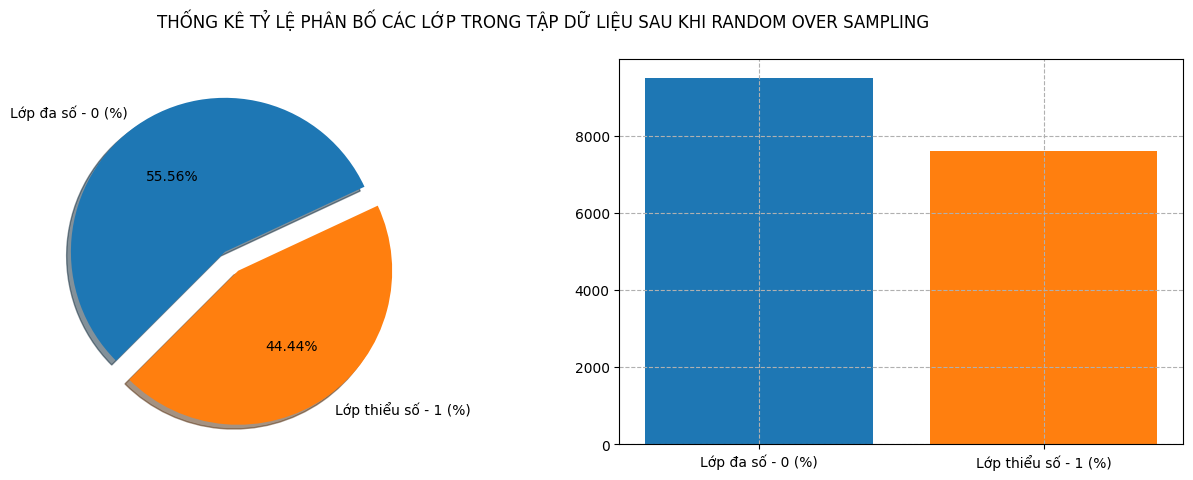

In [14]:
class_y = list(counter11.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI RANDOM OVER SAMPLING', fontsize=12)
plt.show()

### B.2.2) Kỹ thuật SMOTE
---
SMOTE (Synthetic Minority Over-sampling Technique) hoạt động bằng các tạo ra các mẫu tổng hợp từ lớp thiểu số thay cho việc tạo ra các bản sao. Thuật toán chọn 2 hay nhiều trường hợp giống nhau (sử dụng thước đo khoảng cách để so sánh) và xáo trộn một cá thể một thuộc tính tại một thời điểm bằng một lượng ngẫu nhiên trong khoảng chênh lệnh với các trường hợp lân cận

In [15]:
# Sử dụng Phương pháp SMOTE để sinh thêm mẫu cho tập thiểu số
from imblearn.over_sampling import SMOTE
# Tham số sampling_strategy thiết lập tỷ lệ tạo mẫu của tập thiểu số với tập đa số
# Tham số k_neighbors thiết lập số mẫu láng giềng gần nhất sử dụng để sinh mẫu
oversample = SMOTE(sampling_strategy=0.9, 
                   k_neighbors=8)
X12, y12 = oversample.fit_resample(X, y)

counter12 = Counter(y12)
print(counter12)

Counter({0: 9500, 1: 8550})


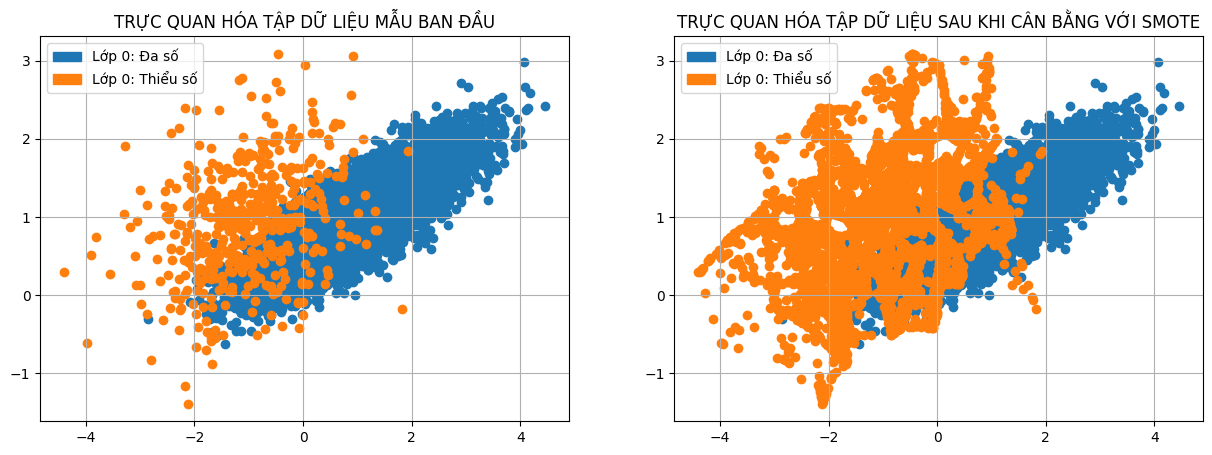

In [16]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU BAN ĐẦU')

plt.subplot(1,2,2)
for label, _ in counter12.items():
	row_ix = np.where(y12 == label)[0]
	plt.scatter(X12[row_ix, 0], X12[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE')

plt.show()

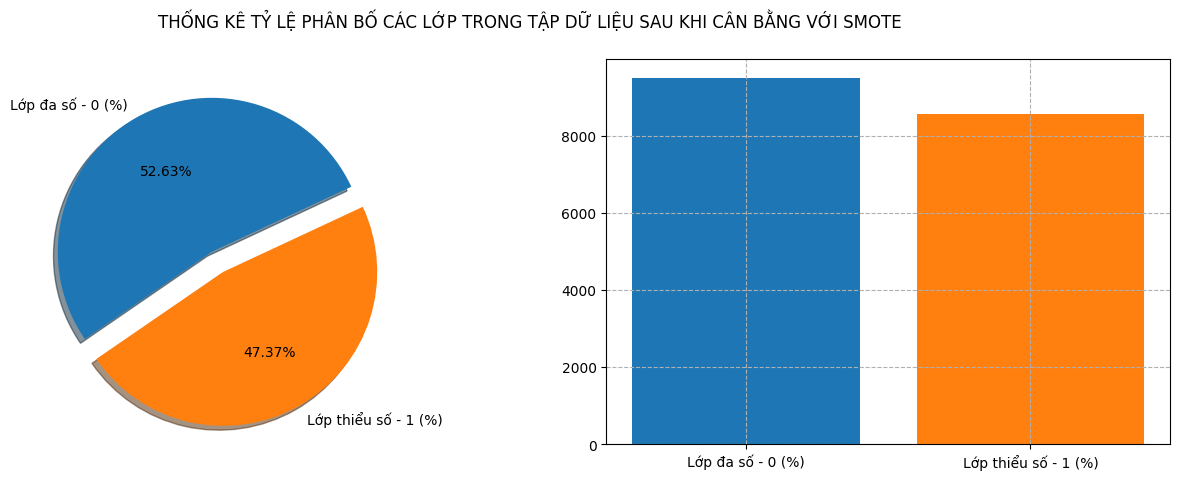

In [17]:
class_y = list(counter12.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE', fontsize=12)
plt.show()

## 2.3. Phương pháp lai giữa Over-Under sampling (Hybrid)
---
Thực hiện phương pháp Over sampling để tăng số mẫu trong lớp thiểu số lên một tỷ lệ nhất định, đồng thời Under sampling để giảm số mẫu trong lớp đa số để thực hiện cân bằng dữ liệu 

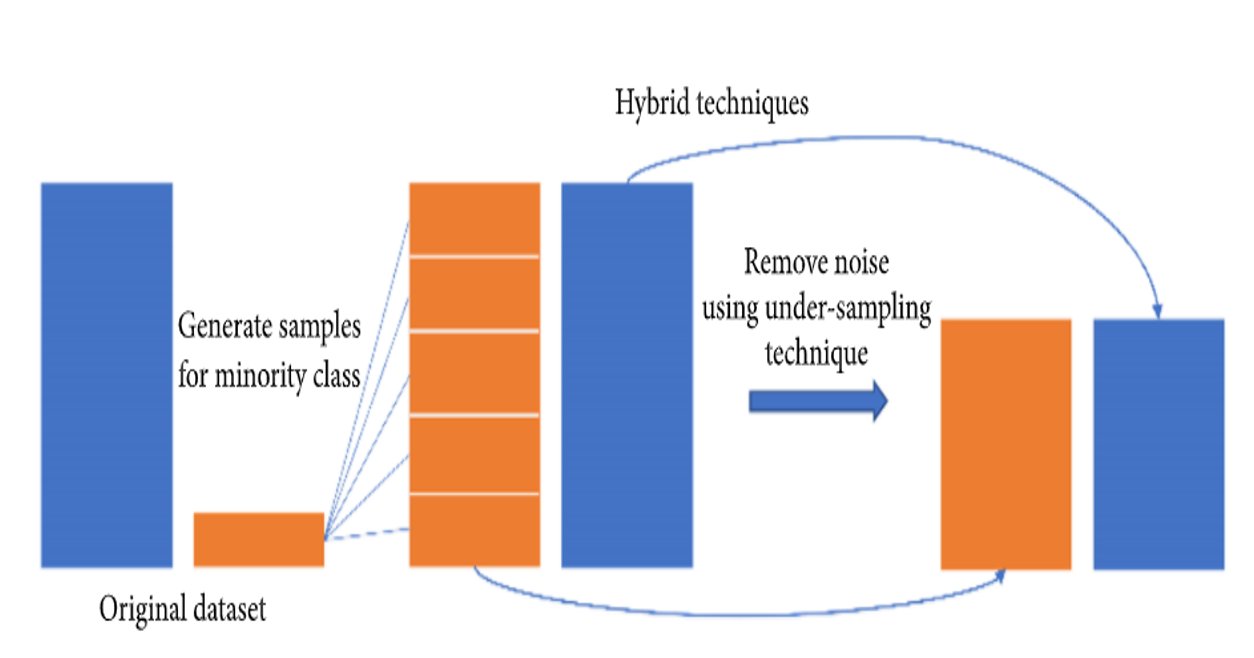


Counter({0: 5937, 1: 4750})


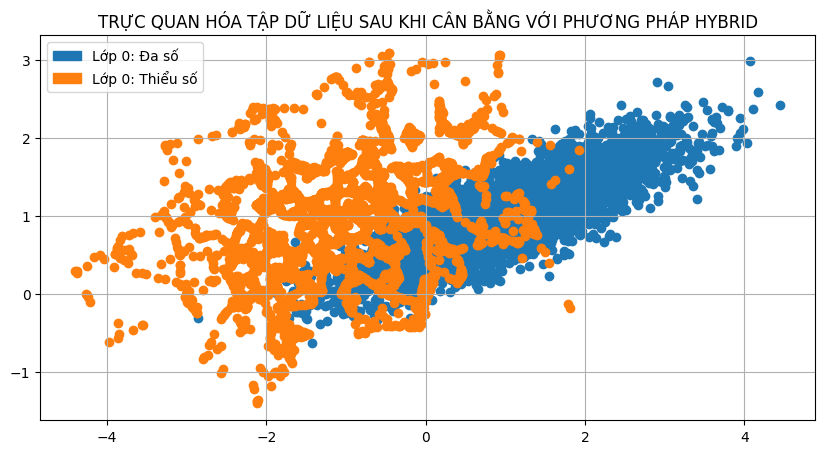

In [18]:
# Phương pháp kết hợp giữa Over và Under sampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Sử dụng phương pháp SMOTE để sinh thêm mẫu trong lớp thiểu số theo tỷ lệ 0.5:1
#Sử dụng phương pháp Random Under Sampling để loại bỏ ngẫu nhiên số mẫu trong lớp đa số theo tỷ lệ 1:0.8

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X,y)


counter4 = Counter(y4)
print(counter4)
# scatter plot of examples by class label
plt.figure(figsize=[10,5])
for label, _ in counter4.items():
	row_ix = np.where(y4 == label)[0]
	plt.scatter(X4[row_ix, 0], X4[row_ix, 1], label=str(label))
plt.grid(True)
plt.legend(handles=[blue_patch,orange_patch])
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI PHƯƠNG PHÁP HYBRID')
plt.show()

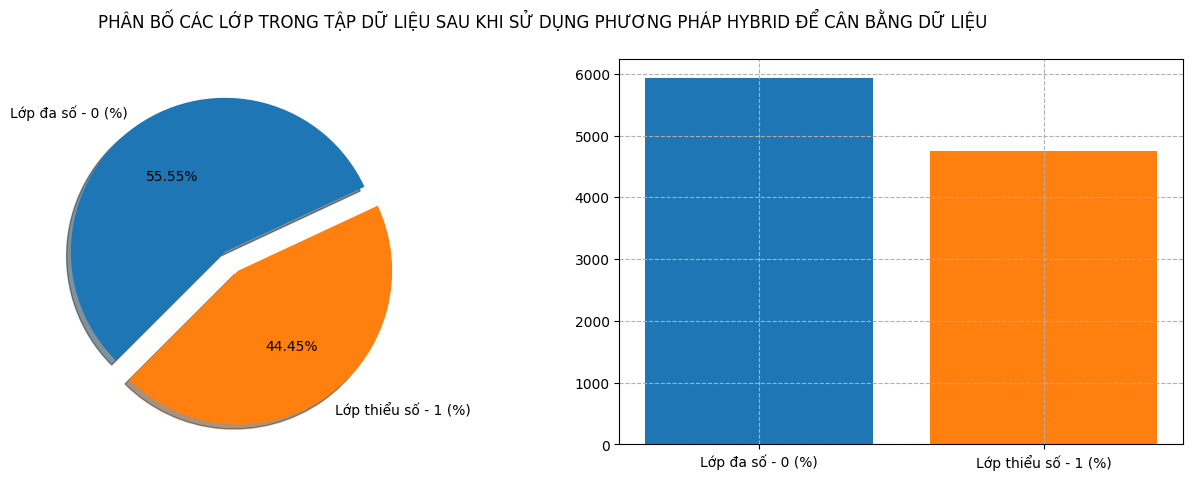

In [19]:
class_y = list(counter4.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI SỬ DỤNG PHƯƠNG PHÁP HYBRID ĐỂ CÂN BẰNG DỮ LIỆU', fontsize=12)
plt.show()